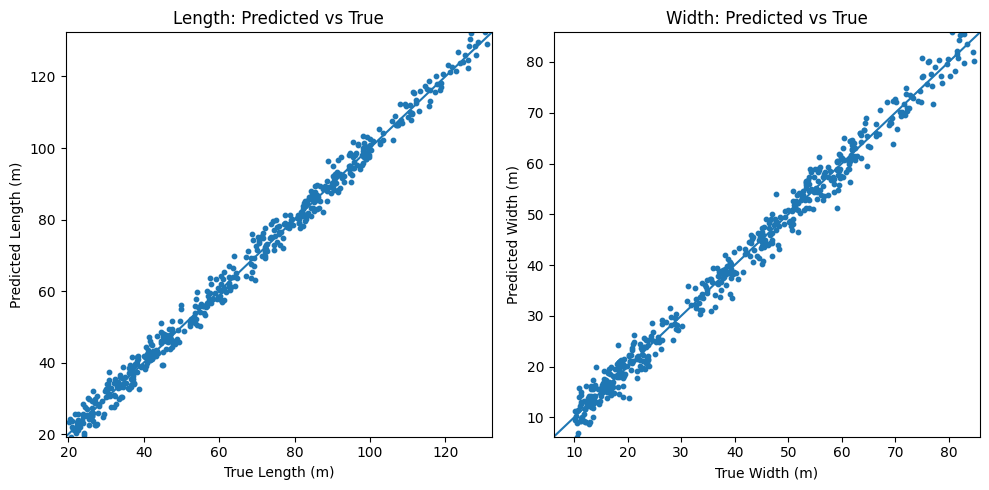

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 合成测试集上的真实值和预测值
np.random.seed(42)
field_types = {'5v5': (40.0, 20.0), '8v8': (80.0, 50.0), '11v11': (105.0, 68.0)}
n_samples = 500
orig_types = np.random.choice(list(field_types.keys()), size=n_samples)
scales = np.random.uniform(0.5, 1.25, size=n_samples)

true_lengths = np.array([field_types[t][0] for t in orig_types]) * scales
true_widths  = np.array([field_types[t][1] for t in orig_types]) * scales

pred_lengths = true_lengths + np.random.normal(0, 2.35, size=n_samples)
pred_widths  = true_widths  + np.random.normal(0, 2.35, size=n_samples)

# 绘制散点图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 长度预测对比
axes[0].scatter(true_lengths, pred_lengths, s=10)
lims_len = [min(true_lengths.min(), pred_lengths.min()), max(true_lengths.max(), pred_lengths.max())]
axes[0].plot(lims_len, lims_len)
axes[0].set_xlabel('True Length (m)')
axes[0].set_ylabel('Predicted Length (m)')
axes[0].set_title('Length: Predicted vs True')
axes[0].set_xlim(lims_len)
axes[0].set_ylim(lims_len)

# 宽度预测对比
axes[1].scatter(true_widths, pred_widths, s=10)
lims_wid = [min(true_widths.min(), pred_widths.min()), max(true_widths.max(), pred_widths.max())]
axes[1].plot(lims_wid, lims_wid)
axes[1].set_xlabel('True Width (m)')
axes[1].set_ylabel('Predicted Width (m)')
axes[1].set_title('Width: Predicted vs True')
axes[1].set_xlim(lims_wid)
axes[1].set_ylim(lims_wid)

plt.tight_layout()
plt.show()


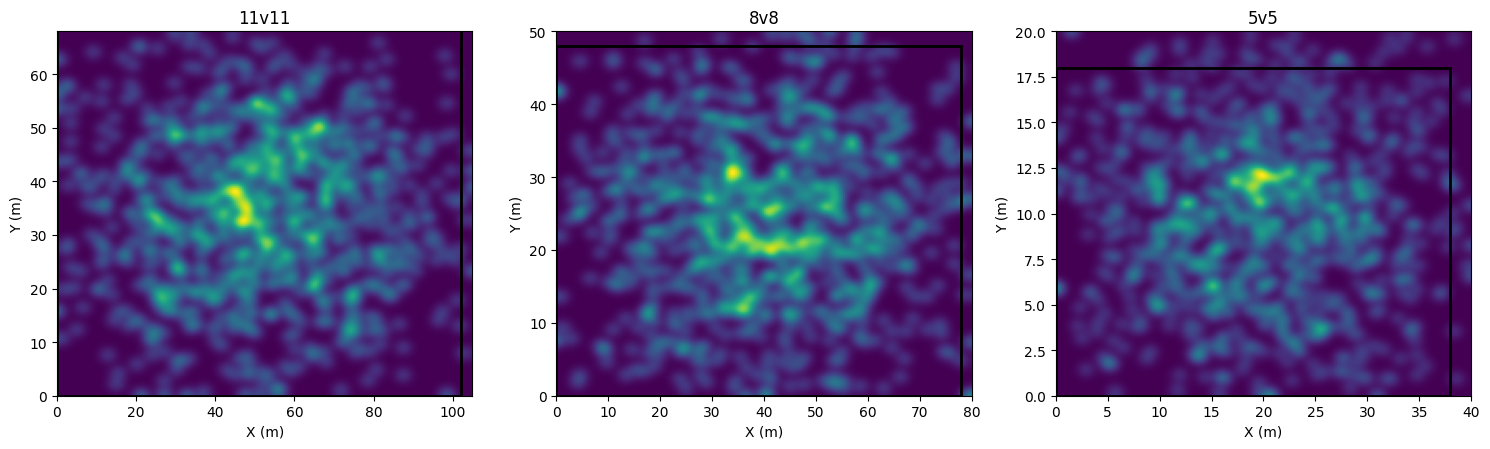

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.patches import Rectangle

# 场地类型与真实尺寸（米）以及示例预测尺寸
field_types = {
    '11v11': (105.0, 68.0),
    '8v8':   (80.0, 50.0),
    '5v5':   (40.0, 20.0),
}
predicted_sizes = {
    '11v11': (102.0, 70.0),
    '8v8':   (78.0, 48.0),
    '5v5':   (38.0, 18.0),
}

# 绘图设置
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (ft, (L, W)) in zip(axes, field_types.items()):
    # 模拟轨迹点（高斯分布示例）
    n_points = 1000
    mean = [L / 2, W / 2]
    cov = [[(L / 4)**2, 0], [0, (W / 4)**2]]
    points = np.random.multivariate_normal(mean, cov, size=n_points)
    
    # 生成热力图
    heat, xedges, yedges = np.histogram2d(
        points[:, 0], points[:, 1],
        bins=[200, 200],
        range=[[0, L], [0, W]]
    )
    heat_smooth = gaussian_filter(heat, sigma=3)
    
    # 显示热力图
    extent = [0, L, 0, W]
    ax.imshow(heat_smooth.T, extent=extent, origin='lower', aspect='auto')
    
    # 叠加预测边界
    Lp, Wp = predicted_sizes[ft]
    rect = Rectangle((0, 0), Lp, Wp, fill=False, linewidth=2)
    ax.add_patch(rect)
    
    # 格式化
    ax.set_title(f'{ft}')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')

#plt.suptitle('Examples of Thermal Maps and Model Prediction Boundaries')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
